In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
data=pd.read_csv('/content/computers.csv');
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/computers.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [ ]:
data.describe()

,Units,Minutes
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


In [ ]:
mean_value=data['Minutes'].mean()
mean_value

97.21428571428571

Text(0, 0.5, 'minutes')

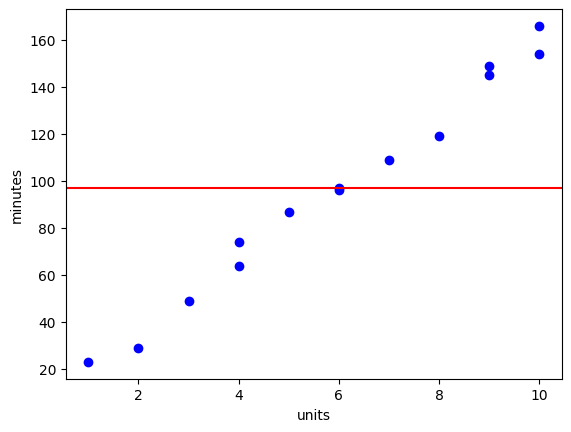

In [ ]:
plt.scatter(data['Units'] ,data['Minutes'] ,color="blue" , marker='o')
plt.axhline(y=mean_value ,c='r')
plt.xlabel('units')
plt.ylabel('minutes')

In [ ]:
minutes_model0=data['Minutes'].mean()
minutes_model1=10+12*data['Units']
minutes_model2=6+18*data['Units']

minutes_model0
minutes_model1
minutes_model2

,Units
0,24
1,42
2,60
3,78
4,78
5,96
6,114
7,114
8,132
9,150


In [ ]:
data['Minutes_model0']=minutes_model0
data['Minutes_model1']=minutes_model1
data['Minutes_model2']=minutes_model2
data
#

,Units,Minutes,Minutes_model0,Minutes_model1,Minutes_model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


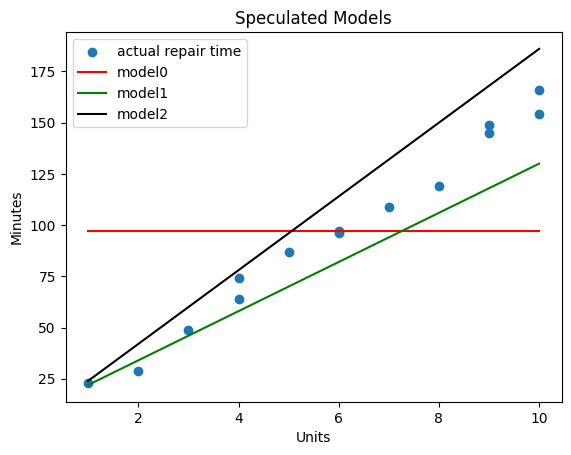

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x='Units',y='Minutes',data=data,label='actual repair time')
ax.plot(data['Units'],data['Minutes_model0'],color='red',label='model0')
ax.plot(data['Units'],data['Minutes_model1'],color='green',label='model1')
ax.plot(data['Units'],data['Minutes_model2'],color='black',label='model2')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

In [ ]:
from re import X
x=data['Units']
y=data['Minutes']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.values.reshape(-1,1),y)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]


In [ ]:
minutes_model3=4.16+15*data['Units']
data['Minutes_Model3']=minutes_model3
data

,Units,Minutes,Minutes_model0,Minutes_model1,Minutes_model2,Minutes_Model3
0,1,23,97.214286,22,24,19.16
1,2,29,97.214286,34,42,34.16
2,3,49,97.214286,46,60,49.16
3,4,64,97.214286,58,78,64.16
4,4,74,97.214286,58,78,64.16
5,5,87,97.214286,70,96,79.16
6,6,96,97.214286,82,114,94.16
7,6,97,97.214286,82,114,94.16
8,7,109,97.214286,94,132,109.16
9,8,119,97.214286,106,150,124.16


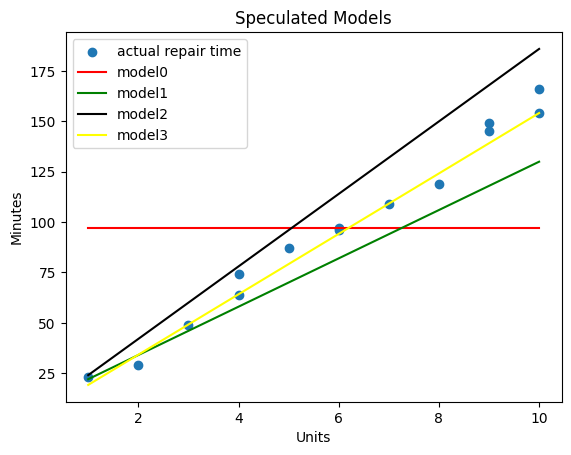

In [ ]:

fig,ax = plt.subplots()
ax.scatter(x='Units',y='Minutes',data=data,label='actual repair time')
ax.plot(data['Units'],data['Minutes_model0'],color='red',label='model0')
ax.plot(data['Units'],data['Minutes_model1'],color='green',label='model1')
ax.plot(data['Units'],data['Minutes_model2'],color='black',label='model2')
ax.plot(data['Units'],data['Minutes_Model3'],color='yellow',label='model3')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

In [ ]:
# prompt: measure the accurecy using regression MSE

from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
mse_model0 = mean_squared_error(data['Minutes'], data['Minutes_model0'])
mse_model1 = mean_squared_error(data['Minutes'], data['Minutes_model1'])
mse_model2 = mean_squared_error(data['Minutes'], data['Minutes_model2'])
mse_model3 = mean_squared_error(data['Minutes'], data['Minutes_Model3'])

print(f"MSE for model 0: {mse_model0}")
print(f"MSE for model 1: {mse_model1}")
print(f"MSE for model 2: {mse_model2}")
print(f"MSE for model 3: {mse_model3}")

MSE for model 0: 1983.4540816326532
MSE for model 1: 356.64285714285717
MSE for model 2: 357.2142857142857
MSE for model 3: 36.35417142857145


In [ ]:
Rsq=model.score(data[['Units']] ,y)
Rsq

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9874371980620736